# Simple Linear Regression from scratch using Gradient Descent

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
# Load the data set
from sklearn.datasets import load_boston

In [4]:
boston_data = load_boston()
type(boston_data)

sklearn.datasets.base.Bunch

In [5]:
boston_data.keys()  #boston_data is a dictionary

dict_keys(['target', 'data', 'DESCR', 'feature_names'])

In [6]:
boston_data['feature_names']     #or boston_data.feature_names To check the features of data

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston_data['data'].shape       #or boston_data.data.shape To check the size of data

(506, 13)

In [8]:
print(boston_data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Pandas DataFrame approach with Boson dataset

In [9]:
df = pd.DataFrame(data=boston_data['data'])

df.columns = boston_data['feature_names']

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
#Add target data to this DataFrame
df['Price'] =  boston_data['target']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
#Check the correlation of all features with Price (Target)
corr = df.corr()
corr['Price'].sort_values(ascending=False)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

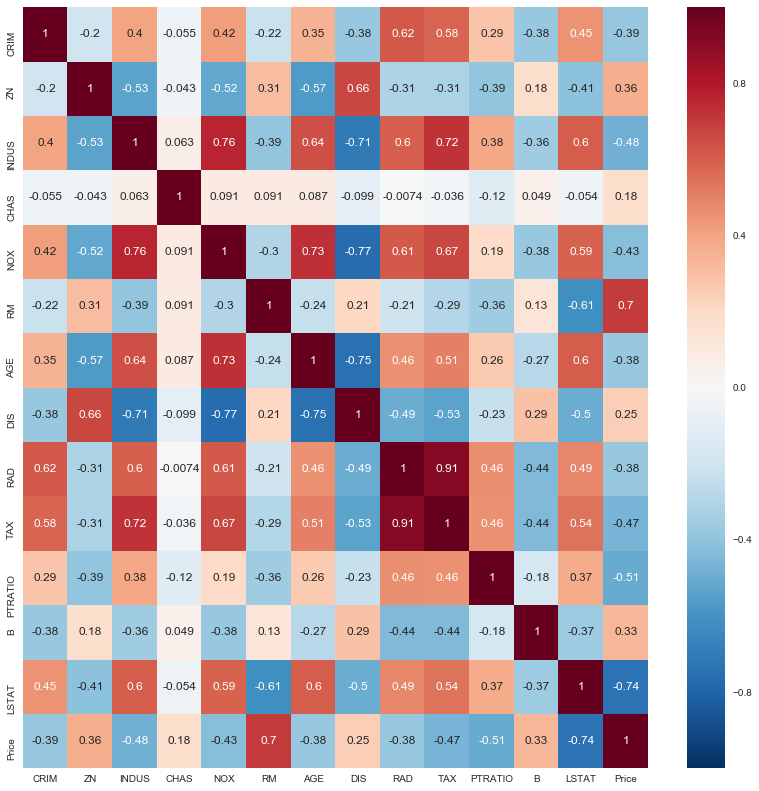

In [13]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True)
plt.show()

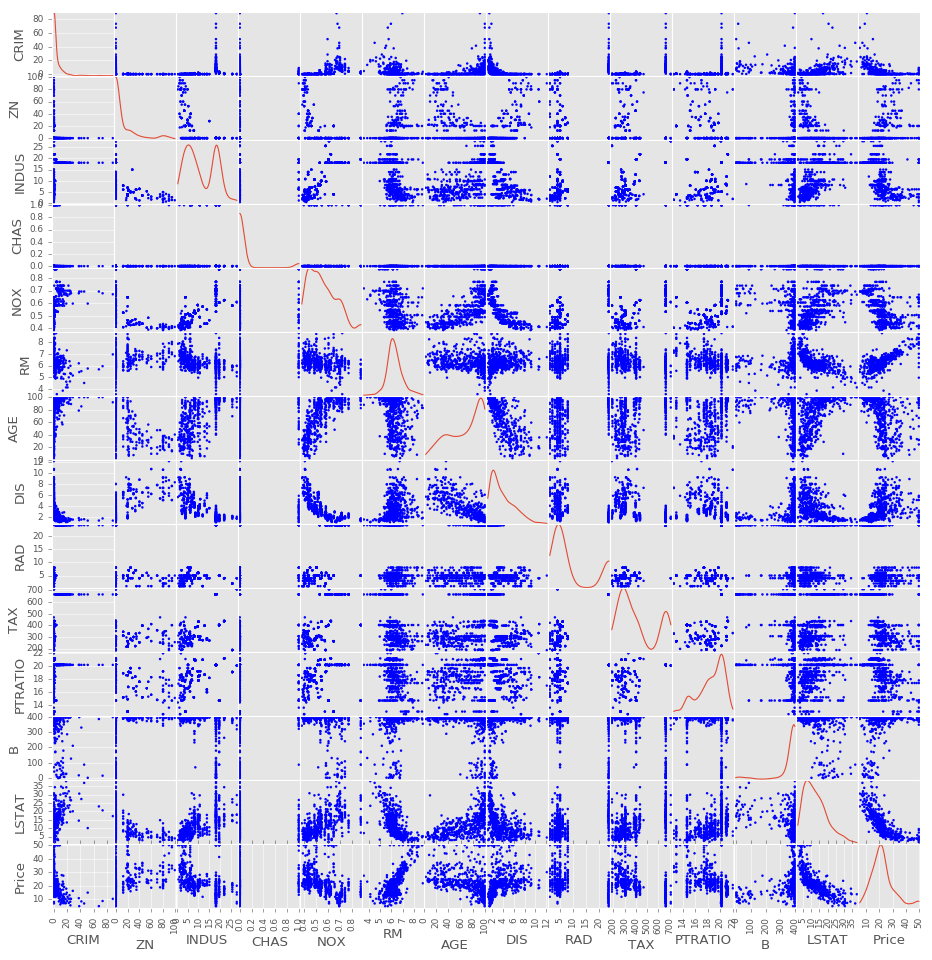

In [14]:
plt.style.use(['classic', 'ggplot'])
pd.plotting.scatter_matrix(df, alpha=1, figsize=(14, 14), grid=True, diagonal='kde')
plt.show()

In [15]:
X = df.loc[:,['RM']]
y = df.loc[:,['Price']]


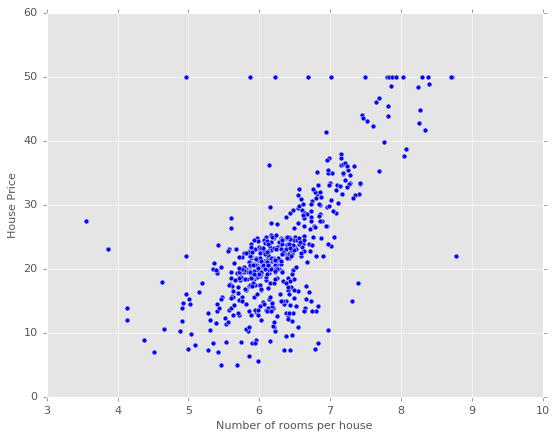

In [16]:
plt.scatter(X,y)
plt.xlabel('Number of rooms per house', size = 10)
plt.ylabel('House Price', size = 10)
plt.show()

In [17]:
#Feature Scaling
X = (X - X.mean())/X.std()
y = (y - y.mean())/y.std()

data=pd.concat((X,y),axis=1)
data.head()

,RM,Price
0,0.413263,0.159528
1,0.194082,-0.101424
2,1.281446,1.322937
3,1.015298,1.181589
4,1.227362,1.486032


## Theory:

<img src="1.png">
<img src="2.png">
<img src="3.png">
<img src="4.png">

In [18]:

X.insert(loc = 0, column='Ones', value = 1, allow_duplicates = False) #consider x0 as ones i.e. we need to add a column of ones to x

In [19]:
X.head()

,Ones,RM
0,1,0.413263
1,1,0.194082
2,1,1.281446
3,1,1.015298
4,1,1.227362


In [20]:
def computeCost(X, y, theta):
    
    m = len(X)
    prediction = X * theta.T
    error = prediction - y
    cost = 1/(2*m) * np.sum(np.power((error), 2))      #cost = (1/2m)*sum[(error)^2]
    
    return cost

In [21]:
#The cost function is expecting numpy matrices so we need to convert X and y to matrices before we can use them.
#We also need to initialize theta.

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros([1,2]))

In [22]:
X.shape, theta.shape, y.shape

((506, 2), (1, 2), (506, 1))

In [23]:
computeCost(X, y, theta)

0.4990118577075095

In [24]:
def gradientDescent(X, y, theta, alpha, iters):
    
    m = len(X)
    parameters = int(theta.ravel().shape[1])   #theta.ravel() o/p is matrix([[0., 0.]]). Therfore shape is (1,2), so parameters=2
    theta_list = np.matrix(np.zeros(theta.shape))     #matrix([[0., 0.]])
    cost_list = np.zeros(iters)
    
    for i in range(iters):
        prediction = X * theta.T
        error = prediction - y
        
        for j in range(parameters):
            theta_list[0,j] = theta[0,j] - ((1/ m) * alpha * np.sum(np.multiply(error, X[:,j])))   # theta -= (1/m) * alpha * sum[error*x]
            
        theta = theta_list
        cost_list[i] = computeCost(X, y, theta)
        
    return theta, cost_list

In [25]:
alpha=0.001
iters=3000

thetaList,costList = gradientDescent(X, y, theta, alpha, iters)

In [26]:
print(thetaList)
print(costList)

[[3.68525939e-15 6.60586176e-01]]
[0.49853048 0.49805007 0.49757061 ... 0.25833275 0.25833154 0.25833033]


### Cost vs Epoch

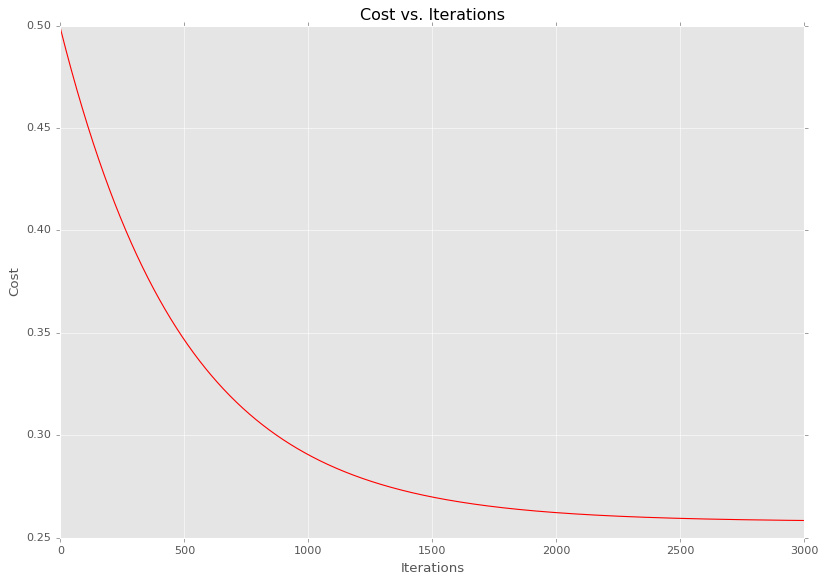

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), costList, 'red')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs. Iterations')
plt.show()

## Fitting the Regression line on data

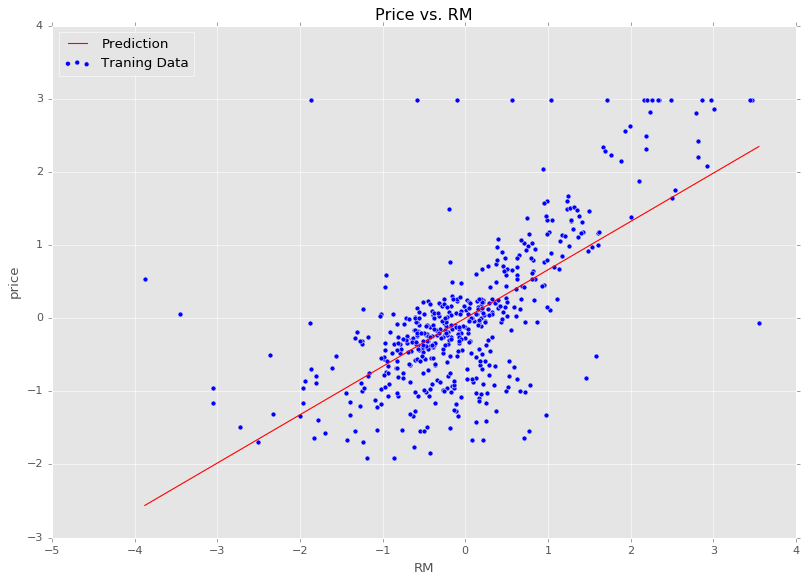

In [28]:
x = np.linspace(data.RM.min(), data.RM.max(), 100)
f = thetaList[0, 0] + (thetaList[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.RM, data.Price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('RM')
ax.set_ylabel('price')
ax.set_title('Price vs. RM')
plt.show()
